In [61]:
from astroML.datasets import fetch_sdss_corrected_spectra

# Download the dataset
data = fetch_sdss_corrected_spectra()

# Check the keys available in the dataset
print("Available keys in the dataset:", list(data.keys()))




Available keys in the dataset: ['norms', 'spectra', 'log_OIII_Hb', 'zerr', 'mu', 'coeffs', 'z', 'coeff1', 'lineindex_cln', 'spec_cln', 'coeff0', 'evals', 'mask', 'log_NII_Ha', 'evecs']


In [62]:
import pandas as pd
import numpy as np

# Extract spectra data
spectra = data['spectra']  # Flux values of the spectra

# Initialize dictionary for storing data
data_dict = {}

# Add redshift if it's an array
if isinstance(data['z'], np.ndarray):
    data_dict['redshift'] = data['z']
else:
    data_dict['redshift'] = np.array([data['z']] * spectra.shape[0])

# Check if class labels exist and are an array, then add them
if 'lineindex_cln' in data.keys() and isinstance(data['lineindex_cln'], np.ndarray):
    data_dict['class'] = data['lineindex_cln']
else:
    data_dict['class'] = np.array([data.get('lineindex_cln', -1)] * spectra.shape[0])  # Fill with -1 if absent

# Add each flux value as separate columns
for i in range(spectra.shape[1]):
    data_dict[f'flux_{i}'] = spectra[:, i]

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data_dict)
df.to_csv("sdss_spectral_data.csv", index=False)

print("Data saved to 'sdss_spectral_data.csv'")


Data saved to 'sdss_spectral_data.csv'


In [63]:
import pandas as pd
# Load the dataset
df = pd.read_csv("sdss_spectral_data.csv")

# Print the first few rows to get a quick look at the data structure
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   redshift  class    flux_0    flux_1    flux_2    flux_3    flux_4  \
0  0.006325      4  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.204065      3  2.189293  2.186866  2.184458  2.182061  2.179677   
2  0.133729      3  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.084296      3  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.131529      2  0.000000  0.000000  0.000000  0.000000  0.000000   

     flux_5   flux_6    flux_7  ...   flux_990   flux_991   flux_992  \
0  0.000000  0.00000  0.000000  ...   8.393729   8.024036   8.561415   
1  1.669877  2.50816  2.002486  ...   0.000000   0.000000   0.000000   
2  0.000000  0.00000  0.000000  ...  11.021602   9.227592   9.952583   
3  0.000000  0.00000  0.000000  ...  22.398006  21.411480  21.953152   
4  0.000000  0.00000  0.000000  ...  10.656296   8.764681  10.720152   

    flux_993   flux_994   flux_995   flux_996   flux_997   flux_998   flux_999  
0   8.434849   8.59716

In [64]:
# Basic information about the dataset
print("\nDataset information:")
print(df.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 1002 entries, redshift to flux_999
dtypes: float64(1001), int64(1)
memory usage: 30.6 MB
None


In [65]:
# Check the number of classes and their distribution
print("\nClass distribution:")
print(df['class'].value_counts())



Class distribution:
class
3    1304
4    1299
2    1191
5     156
6      20
1      19
9      10
0       1
Name: count, dtype: int64


In [66]:
# Summary statistics for the dataset
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
          redshift        class       flux_0       flux_1       flux_2  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.100506     3.124750     0.105561     0.122171     0.142147   
std       0.048798     0.958862     0.932217     0.934320     1.011277   
min       0.000034     0.000000    -5.698249    -3.893136    -2.914214   
25%       0.067503     2.000000     0.000000     0.000000     0.000000   
50%       0.094852     3.000000     0.000000     0.000000     0.000000   
75%       0.125887     4.000000     0.000000     0.000000     0.000000   
max       0.337862     9.000000    41.286280    37.889194    40.595238   

            flux_3       flux_4       flux_5       flux_6       flux_7  ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  ...   
mean      0.137146     0.152160     0.153477     0.135050     0.137820  ...   
std       1.037152     1.032557     1.067057     0.987847     1.058474  ...

In [67]:
# Number of samples in the dataset
print(f"\nTotal number of samples: {len(df)}")



Total number of samples: 4000


In [68]:
# List of unique classes
unique_classes = df['class'].unique()
print(f"\nUnique classes (object types): {unique_classes}")
print(f"Total number of unique classes: {len(unique_classes)}")


Unique classes (object types): [4 3 2 5 6 9 1 0]
Total number of unique classes: 8


C:\Users\smrit\AppData\Local\Temp\ipykernel_20600\2667500553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


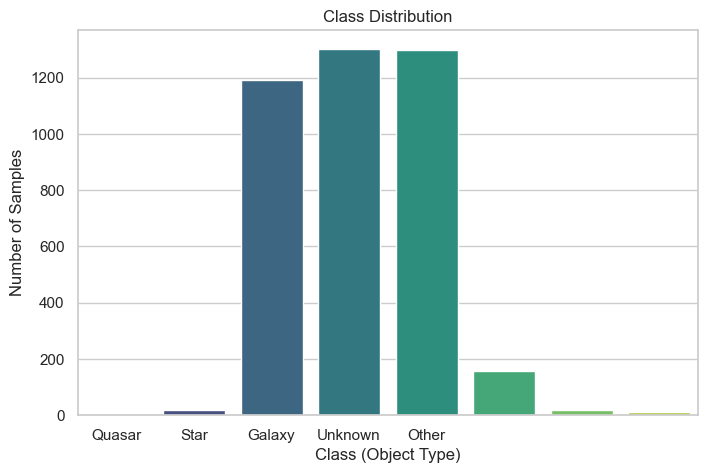

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class (Object Type)')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Quasar', 'Star', 'Galaxy', 'Unknown', 'Other'])
plt.show()


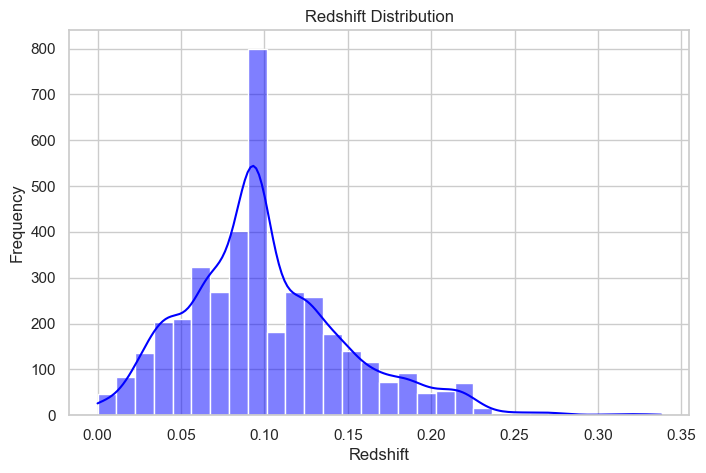

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(df['redshift'], bins=30, kde=True, color='blue')
plt.title('Redshift Distribution')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.show()


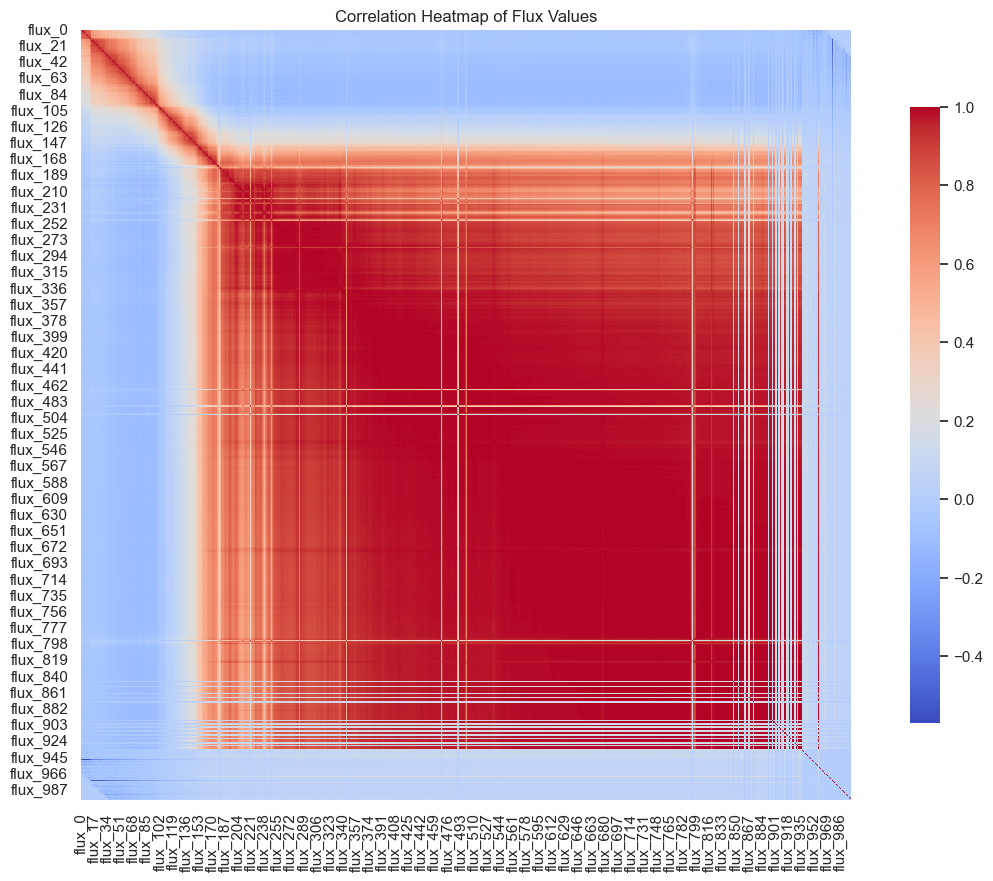

In [72]:
# Calculate correlation matrix for the flux columns
corr_matrix = df.iloc[:, 2:].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Flux Values')
plt.show()


In [73]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Missing values per column:
Series([], dtype: int64)

Total missing values in the dataset: 0


In [74]:
df.head(1)

,redshift,class,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_990,flux_991,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999
0,0.006325,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.393729,8.024036,8.561415,8.434849,8.597162,8.344885,8.907126,7.50933,7.970523,7.984391


In [75]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Separate the features and the target variable
X = df.drop(['class'], axis=1)  # Assuming 'class' is the target column
y = df['class']

# Fit and transform the features using StandardScaler
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for better readability (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display first few rows of the scaled data
print(X_scaled_df.head())


   redshift    flux_0    flux_1    flux_2    flux_3    flux_4    flux_5  \
0 -1.930270 -0.113250 -0.130775 -0.140580 -0.132250 -0.147381 -0.143850   
1  2.122458  2.235523  2.210114  2.019789  1.971909  1.963834  1.421283   
2  0.680908 -0.113250 -0.130775 -0.140580 -0.132250 -0.147381 -0.143850   
3 -0.332240 -0.113250 -0.130775 -0.140580 -0.132250 -0.147381 -0.143850   
4  0.635818 -0.113250 -0.130775 -0.140580 -0.132250 -0.147381 -0.143850   

     flux_6    flux_7    flux_8  ...  flux_990  flux_991  flux_992  flux_993  \
0 -0.136728 -0.130223 -0.136220  ...  0.016733  0.021795  0.026706  0.040321   
1  2.402606  1.761875  1.352119  ... -0.003484  0.004611  0.010554  0.027005   
2 -0.136728 -0.130223 -0.136220  ...  0.023063  0.024372  0.029331  0.043177   
3 -0.136728 -0.130223 -0.136220  ...  0.050463  0.050464  0.051971  0.060404   
4 -0.136728 -0.130223 -0.136220  ...  0.022183  0.023381  0.030779  0.043150   

   flux_994  flux_995  flux_996  flux_997  flux_998  flux_999  
0  0

In [76]:
# Define function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers_iqr(X_scaled_df)
print(f"Columns with outliers:\n{[col for col, out in outliers.items() if not out.empty]}")


Columns with outliers:
['redshift', 'flux_0', 'flux_1', 'flux_2', 'flux_3', 'flux_4', 'flux_5', 'flux_6', 'flux_7', 'flux_8', 'flux_9', 'flux_10', 'flux_11', 'flux_12', 'flux_13', 'flux_14', 'flux_15', 'flux_16', 'flux_17', 'flux_18', 'flux_19', 'flux_20', 'flux_21', 'flux_22', 'flux_23', 'flux_24', 'flux_25', 'flux_26', 'flux_27', 'flux_28', 'flux_29', 'flux_30', 'flux_31', 'flux_32', 'flux_33', 'flux_34', 'flux_35', 'flux_36', 'flux_37', 'flux_38', 'flux_39', 'flux_40', 'flux_41', 'flux_42', 'flux_43', 'flux_44', 'flux_45', 'flux_46', 'flux_47', 'flux_48', 'flux_49', 'flux_50', 'flux_51', 'flux_52', 'flux_53', 'flux_54', 'flux_55', 'flux_56', 'flux_57', 'flux_58', 'flux_59', 'flux_60', 'flux_61', 'flux_62', 'flux_63', 'flux_64', 'flux_65', 'flux_66', 'flux_67', 'flux_68', 'flux_69', 'flux_70', 'flux_71', 'flux_72', 'flux_73', 'flux_74', 'flux_75', 'flux_76', 'flux_77', 'flux_78', 'flux_79', 'flux_80', 'flux_81', 'flux_82', 'flux_83', 'flux_84', 'flux_85', 'flux_86', 'flux_87', 'flux_

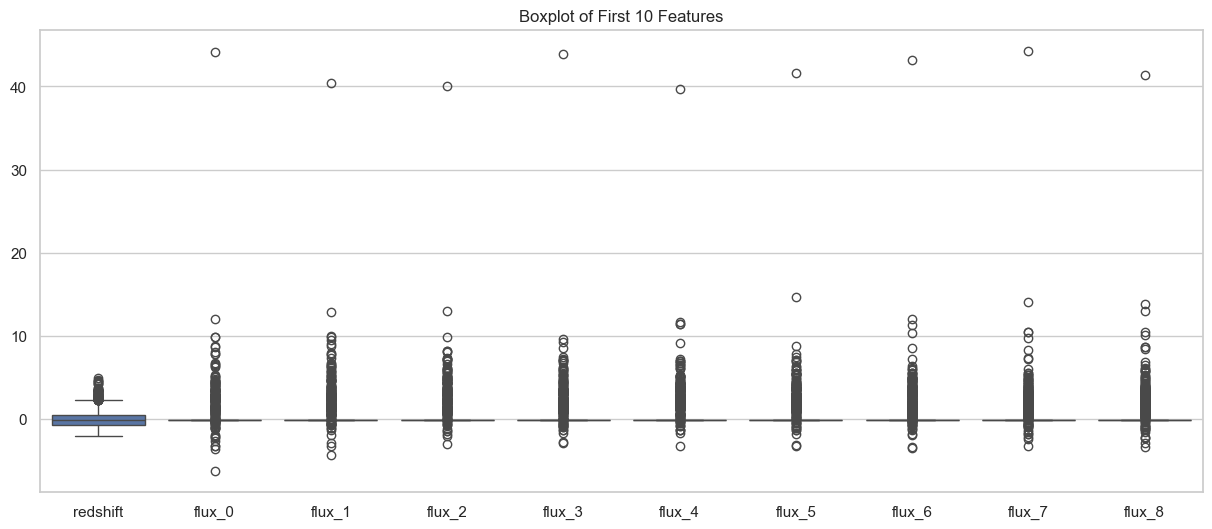

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for a subset of the data
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_scaled_df.iloc[:, :10])  # Adjust number of columns as needed for visibility
plt.title("Boxplot of First 10 Features")
plt.show()


In [78]:
# Cap and floor outliers
for col in X_scaled_df.columns:
    Q1 = X_scaled_df[col].quantile(0.25)
    Q3 = X_scaled_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_scaled_df[col] = X_scaled_df[col].clip(lower=lower_bound, upper=upper_bound)
print("Outliers capped.")


Outliers capped.


In [79]:
# Detect outliers in the dataset
outliers = detect_outliers_iqr(X_scaled_df)
print(f"Columns with outliers:\n{[col for col, out in outliers.items() if not out.empty]}")

Columns with outliers:
[]


Handling class imbalance using SMOTE

In [80]:
from imblearn.over_sampling import SMOTE
# Assuming 'class' is the target variable
Xs = X_scaled_df # Features
from imblearn.over_sampling import SMOTE
from collections import Counter

# Current class distribution
class_counts = y.value_counts()
print("Class distribution:\n", class_counts)

# Remove the class with only 1 sample if necessary
if class_counts[0] < 2:
    # Optionally remove class 0 or handle it as needed
    print("Removing class 0 due to insufficient samples.")
    Xs = X[y != 0]
    y = y[y != 0]

# Update the class distribution after potential removal
class_counts = y.value_counts()
print("Updated class distribution:\n", class_counts)





Class distribution:
 class
3    1304
4    1299
2    1191
5     156
6      20
1      19
9      10
0       1
Name: count, dtype: int64
Removing class 0 due to insufficient samples.
Updated class distribution:
 class
3    1304
4    1299
2    1191
5     156
6      20
1      19
9      10
Name: count, dtype: int64


In [81]:
smote = SMOTE(sampling_strategy={5: 1191, 6: 1191, 1: 1191, 9: 1191},random_state=42, k_neighbors=3)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(Xs, y)

# Convert back to DataFrame for further analysis if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Check the class distribution after resampling
print("Class distribution after SMOTE:\n", y_resampled_df['class'].value_counts())

Class distribution after SMOTE:
 class
3    1304
4    1299
2    1191
5    1191
6    1191
9    1191
1    1191
Name: count, dtype: int64


In [90]:
X_resampled_df.shape

(8558, 1001)

Shape of dataset after adding Fourier features: (8558, 1999)


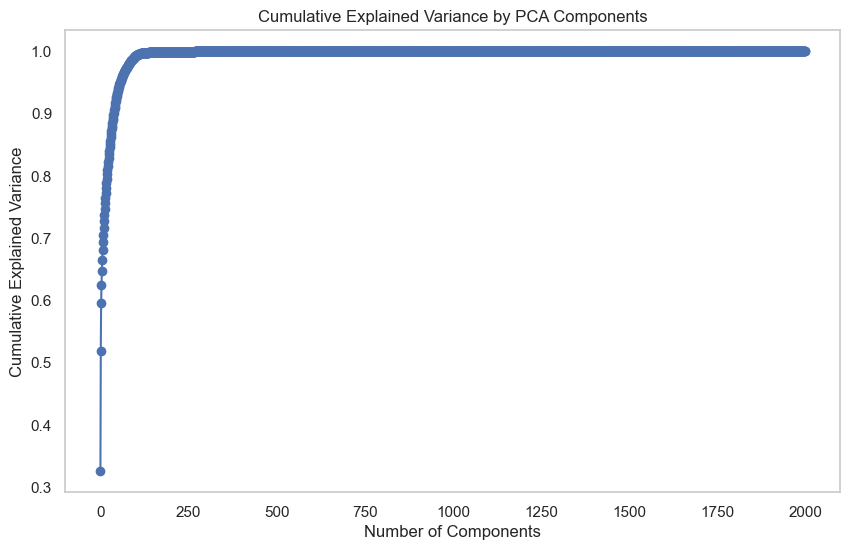

In [82]:
import numpy as np
import pandas as pd
from astroML.fourier import FT_continuous
from sklearn.decomposition import PCA
# Fourier features calculation, ensuring even sample length
fourier_features = []

for index, row in X_resampled.iterrows():  # Replace X_resampled with your actual DataFrame
    t = np.arange(len(row[2:]))  # Assuming flux values start from index 2
    flux = row[2:].values  # Extract flux values

    # Ensure even number of samples in `flux`
    if len(flux) % 2 != 0:
        flux = flux[:-1]  # Remove last element to make it even
    t = t[:len(flux)]

    # Compute Fourier transform
    frequencies, fourier_coefficients = FT_continuous(t, flux, method=1)

    # Append the Fourier coefficients as features
    fourier_features.append(fourier_coefficients.real)  # Use .real if imaginary part is not needed

# Convert the list of Fourier features to a DataFrame
fourier_features_df = pd.DataFrame(fourier_features, columns=[f'fourier_feature_{i}' for i in range(fourier_features[0].shape[0])])

# Now you can proceed to combine this DataFrame with your original data
X_resampled_with_fourier = pd.concat([X_resampled.reset_index(drop=True), fourier_features_df], axis=1)
print("Shape of dataset after adding Fourier features:", X_resampled_with_fourier.shape)


# Continue with the rest of your process.



X = X_resampled_with_fourier

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Transform the data to PCA space
X_pca = pca.transform(X_scaled)

# Create a DataFrame for PCA components
pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Combine PCA components with labels
final_dataset = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_


# Optionally, you can plot the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [83]:
import pandas as pd

# Calculate the variance of each feature
variance = X.var()

# Set a threshold for minimum variance (you may adjust this value as needed)
variance_threshold = 0.001
X_filtered = X.loc[:, variance > variance_threshold]

print(f"Number of features before filtering: {X.shape[1]}")
print(f"Number of features after filtering: {X_filtered.shape[1]}")


Number of features before filtering: 1999
Number of features after filtering: 1999


In [84]:
from sklearn.decomposition import PCA

# Initialize PCA with explained variance threshold (0.95 for 95%)
pca = PCA(n_components=0.95, random_state=42)

# Fit PCA to the filtered data
X_pca = pca.fit_transform(X_filtered)

# Check the number of components selected
print(f"Number of components selected to retain 95% variance: {X_pca.shape[1]}")
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Number of components selected to retain 95% variance: 48
Explained variance by each component: [0.33476205 0.12094784 0.03483474 0.02983003 0.02810037 0.02062213
 0.01968883 0.01841691 0.01638256 0.01614001 0.01566574 0.01482135
 0.01430357 0.01424026 0.01351939 0.01265072 0.01151963 0.01119707
 0.01085677 0.01049126 0.0101446  0.01000835 0.00900969 0.00889331
 0.00888149 0.00864889 0.00860964 0.008291   0.0079522  0.00786767
 0.00761421 0.00748784 0.00739342 0.00695263 0.0068366  0.00673353
 0.00577973 0.00567422 0.00528609 0.00490353 0.00479411 0.00464588
 0.00391342 0.00368448 0.00356552 0.00333941 0.00328745 0.00324105]
Total explained variance: 0.9524312038700458


In [87]:
import pandas as pd

# Define column names for each principal component
pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]

# Convert the PCA result into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)


In [89]:
X_pca_df.shape

(8558, 48)

In [103]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled_df and y_resampled_df are already defined
X = X_pca_df  # Features
y = y_resampled_df
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6846, 48)
Shape of y_train: (6846,)
Shape of X_test: (1712, 48)
Shape of y_test: (1712,)


In [111]:
# Ensure y_train and y_test are one-dimensional arrays
y_train = np.ravel(y_train)  # Flatten to 1D if it's not
y_test = np.ravel(y_test)    # Flatten to 1D if it's not


In [119]:
from astroML.classification import GMMBayes
# Initialize the GMMBayes classifier
gmm = GMMBayes(n_components=5)  # Choose an appropriate number of components
params = gmm.get_params()
print(params)

# Fit the model
gmm.fit(X_train, y_train)
y_pred = gmm.predict(X_test)

accuracy = gmm.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


{'n_components': array([5])}
Accuracy: 0.58


In [120]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Assuming y_pred contains the predictions from your model
# y_pred = gmm.predict(X_test)  # Make sure this line is included

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       252
           2       0.14      0.02      0.04       239
           3       0.70      0.11      0.19       251
           4       0.12      0.02      0.04       267
           5       0.27      1.00      0.42       233
           6       1.00      1.00      1.00       231
           9       1.00      1.00      1.00       239

    accuracy                           0.58      1712
   macro avg       0.60      0.59      0.53      1712
weighted avg       0.60      0.58      0.52      1712



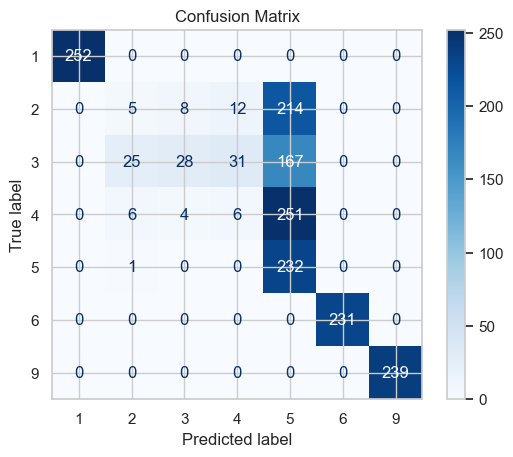

In [121]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


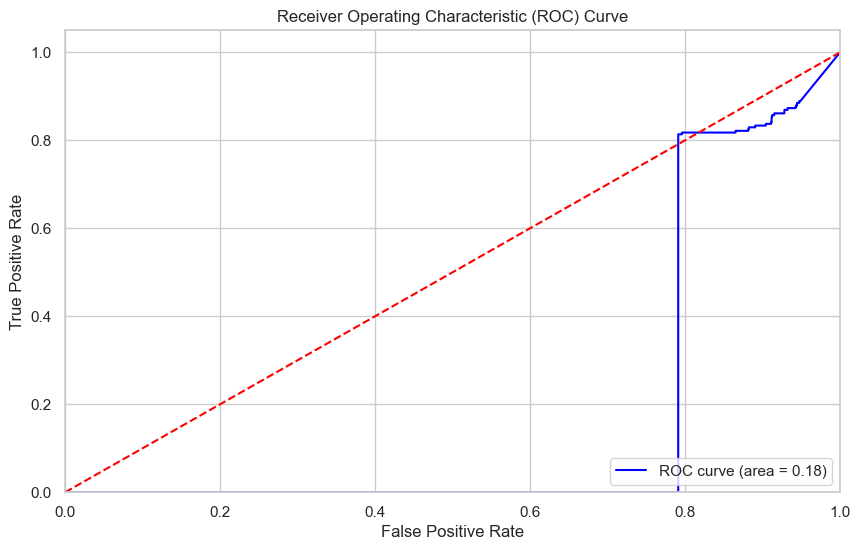

In [122]:
from sklearn.metrics import roc_curve, auc
# Get the probabilities for the positive class
y_prob = gmm.predict_proba(X_test)

# If you have multiple classes, select the probabilities for one class
# Assuming class 1 is your positive class
y_true_binary = (y_test == 1).astype(int)  # Convert to binary for class 1
y_prob_binary = y_prob[:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob_binary)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [123]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       252
           2       0.45      0.44      0.45       239
           3       0.48      0.46      0.47       251
           4       0.70      0.64      0.67       267
           5       0.67      0.76      0.71       233
           6       0.91      0.95      0.93       231
           9       0.99      1.00      1.00       239

    accuracy                           0.74      1712
   macro avg       0.74      0.74      0.74      1712
weighted avg       0.74      0.74      0.74      1712



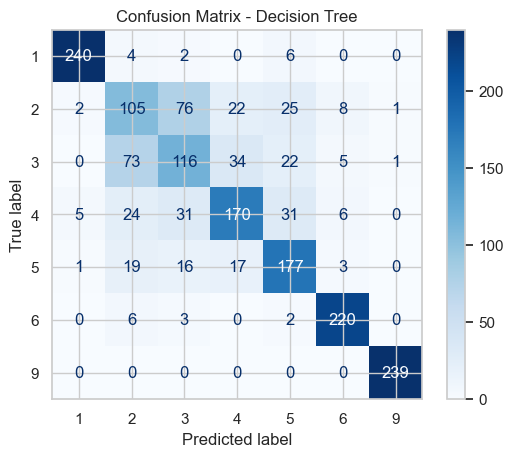

In [124]:
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


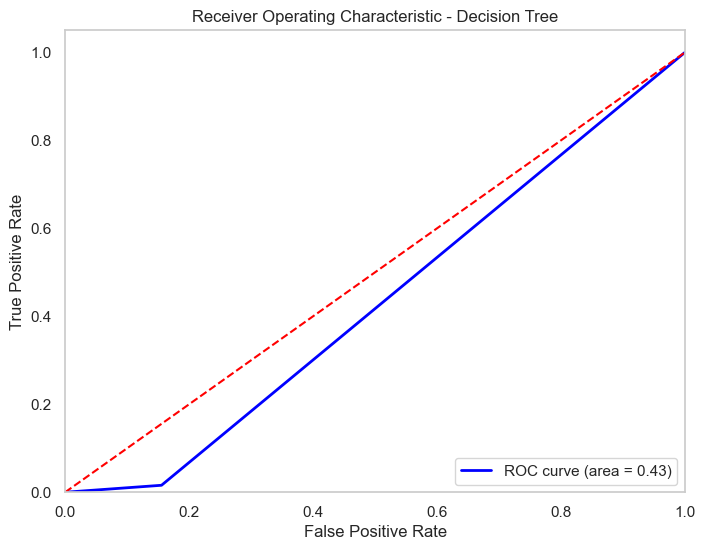

In [127]:
# Get predicted probabilities for the positive class
y_scores = dt.predict_proba(X_test)[:, 1]  # Adjust the index if your positive class is not at index 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)  # Adjust pos_label as needed
roc_auc = auc(fpr, tpr)  # Compute area under the ROC curve

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

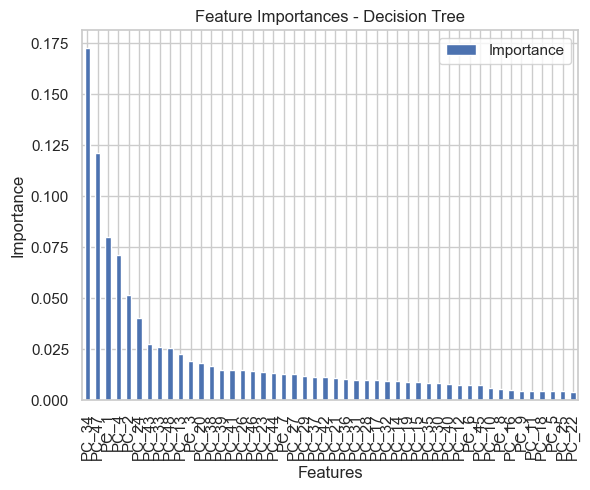

In [126]:
# Get feature importances
importances = dt.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances - Decision Tree")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [139]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       252
           2       0.53      0.55      0.54       239
           3       0.54      0.50      0.52       251
           4       0.82      0.75      0.79       267
           5       0.83      0.90      0.86       233
           6       0.96      1.00      0.98       231
           9       1.00      1.00      1.00       239

    accuracy                           0.81      1712
   macro avg       0.81      0.81      0.81      1712
weighted avg       0.80      0.81      0.81      1712



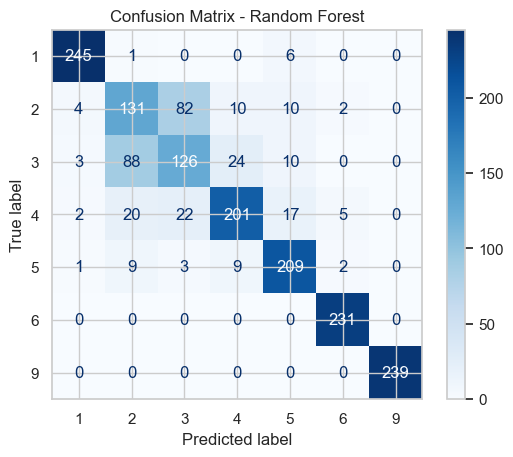

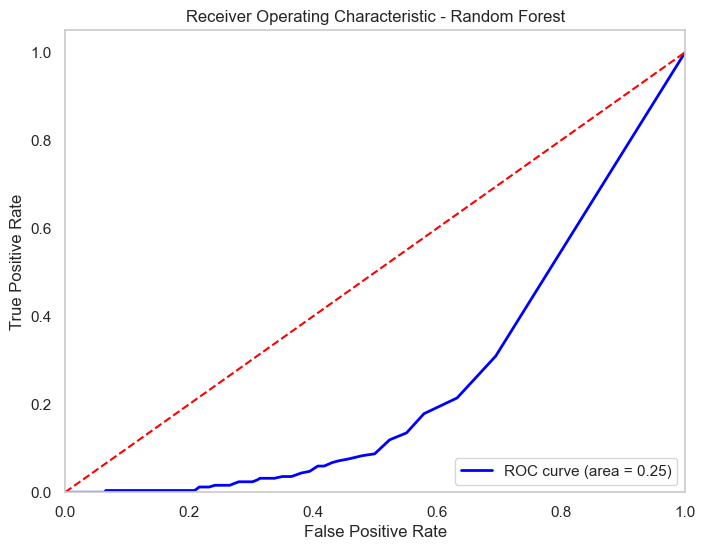

In [140]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Get predicted probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]  # Adjust the index if your positive class is not at index 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)  # Adjust pos_label as needed
roc_auc = auc(fpr, tpr)  # Compute area under the ROC curve

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

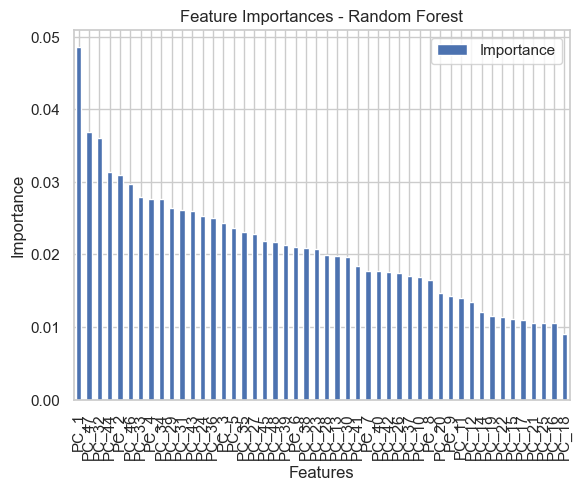

In [142]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)



# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()
